In [12]:
%load_ext autoreload
%autoreload 2

import os
import torch
import torchaudio

from utils import print_stats, plot_waveform, plot_specgram, play_audio, plot_spectrogram
from dataloader_audio import AudioDataset

print(f"Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")
# print(f"torchaudio {torchaudio.__version__}")

AUDIO_DIR = 'data/audio'
LABEL_DIR = 'data/label'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using torch 1.9.1 (NVIDIA GeForce RTX 3060 Laptop GPU)


## Dataset

In [2]:
training_data = AudioDataset(AUDIO_DIR, LABEL_DIR)
test_data = AudioDataset(AUDIO_DIR, LABEL_DIR)

# print('First iteration of data set: ', next(iter(training_data)))
# print(len(training_data))
# print(len(test_data))

## DataLoader

In [3]:
train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

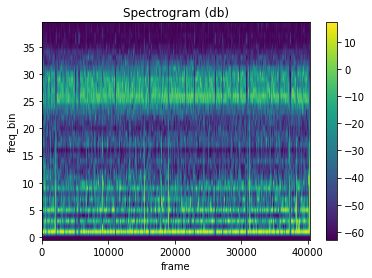

Label: 2 Broadway
From Wikipedia, the free encyclopedia

2 Broadway is an office building at the south end of Broadway, near Bowling Green Park in New York City. 2 Broadway was built on the site of the Produce Exchange Building, and now houses the headquarters of the Metropolitan Transportation Authority.
Description and history
New York Produce Exchange (1883)

The Produce Exchange was a representative structure of brick with terracotta decorations. Its grand skylighted hall, based on French retail structures, cast daylight into the lower floors. Its architect was George B. Post, who built it from 1881â€“84.

The Produce Exchange Building was demolished in 1957 and replaced by a 32-story tower constructed in 1958-1959. The developer, Uris Buildings Corporation, first preferred a design by William Lescaze with Kahn & Jacobs, which featured a tower slab set at right angles to Broadway. However, ultimately Emery Roth & Sons was given the contract, which saw a radically different design w

In [4]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
mfcc = train_features[0][0]
label = train_labels[0]

plot_spectrogram(mfcc)
print(f"Label: {label}")

## Transform

In [9]:
char_map_str = """
 ' 0
 <SPACE> 1
 a 2
 b 3
 c 4
 d 5
 e 6
 f 7
 g 8
 h 9
 i 10
 j 11
 k 12
 l 13
 m 14
 n 15
 o 16
 p 17
 q 18
 r 19
 s 20
 t 21
 u 22
 v 23
 w 24
 x 25
 y 26
 z 27
 """
char_map_str

"\n ' 0\n <SPACE> 1\n a 2\n b 3\n c 4\n d 5\n e 6\n f 7\n g 8\n h 9\n i 10\n j 11\n k 12\n l 13\n m 14\n n 15\n o 16\n p 17\n q 18\n r 19\n s 20\n t 21\n u 22\n v 23\n w 24\n x 25\n y 26\n z 27\n "

In [10]:
class TextTransform:
    def __init__(self):
        char_map_str = char_map_str
        self.char_map = {}
        self.index_map = {}
        for line in char_map_str.strip().split('\n'):
            ch, index = line.split()
            self.char_map[ch] = int(index)
            self.index_map[int(index)] = ch
        self.index_map[1] = ' '
        
    def text_to_int(self, text):
        """ Use a character map and convert text to an integer sequence """
        int_sequence = []
        for c in text:
            if c == ' ':
                ch = self.char_map['']
            else:
                ch = self.char_map[c]
            int_sequence.append(ch)
        return int_sequence

    def int_to_text(self, labels):
        """ Use a character map and convert integer labels to an text sequence """
        string = []
        for i in labels:
            string.append(self.index_map[i])
        return ''.join(string).replace('', ' ')

In [13]:
train_audio_transforms = nn.Sequential(
    torchaudio.transforms.MelSpectrogram(sample_rate=16000, n_mels=128),
    torchaudio.transforms.FrequencyMasking(freq_mask_param=15),
    torchaudio.transforms.TimeMasking(time_mask_param=35)
)

## Model

In [5]:
from torch import nn

In [ ]:
class NeuralNetwork(nn.Module):
    super(NeuralNetwork, self).__init__()
    self.